In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import random
from sympy import *
import scipy

In [3]:
# solve stationary distribution & find phi 
from scipy.linalg import solve
reward = [0]*91
flag = [0]*90
flag.append(1)

probability = np.zeros((91,91))
poisson = np.zeros((91,91))
for i in range(91):
    reward[i] = (i*0.01 + 0.1)
    probability[i,0] = i*0.01 + 0.1
    if i < 90:
        probability[i,i+1] = 1 - probability[i,0]
for i in range(91):
    for j in range(91):
        poisson[i,j] = - probability[i,j]
        # poisson[91, j] = 1
    poisson[i, i] = poisson[i, i] + 1
    poisson[i, 90] = 1

print(poisson.T)

# print(len(poisson))

result = np.linalg.solve(poisson.T, flag)

print(probability)
print(poisson.T)
print(result)
re = []
for i in range(91):
    re.append(result[i] * reward[i])
    
print(sum(result))
print(sum(re))

[[ 0.9  -0.11 -0.12 ... -0.98 -0.99 -1.  ]
 [-0.9   1.   -0.   ... -0.   -0.   -0.  ]
 [-0.   -0.89  1.   ... -0.   -0.   -0.  ]
 ...
 [-0.   -0.   -0.   ...  1.   -0.   -0.  ]
 [-0.   -0.   -0.   ... -0.02  1.   -0.  ]
 [ 1.    1.    1.   ...  1.    1.    1.  ]]
[[0.1  0.9  0.   ... 0.   0.   0.  ]
 [0.11 0.   0.89 ... 0.   0.   0.  ]
 [0.12 0.   0.   ... 0.   0.   0.  ]
 ...
 [0.98 0.   0.   ... 0.   0.02 0.  ]
 [0.99 0.   0.   ... 0.   0.   0.01]
 [1.   0.   0.   ... 0.   0.   0.  ]]
[[ 0.9  -0.11 -0.12 ... -0.98 -0.99 -1.  ]
 [-0.9   1.   -0.   ... -0.   -0.   -0.  ]
 [-0.   -0.89  1.   ... -0.   -0.   -0.  ]
 ...
 [-0.   -0.   -0.   ...  1.   -0.   -0.  ]
 [-0.   -0.   -0.   ... -0.02  1.   -0.  ]
 [ 1.    1.    1.   ...  1.    1.    1.  ]]
[1.46097542e-01 1.31487788e-01 1.17024131e-01 1.02981235e-01
 8.95936746e-02 7.70505602e-02 6.54929762e-02 5.50141000e-02
 4.56617030e-02 3.74425964e-02 3.03285031e-02 2.42628025e-02
 1.91676140e-02 1.49507389e-02 1.15120690e-02 8.74917240e-03


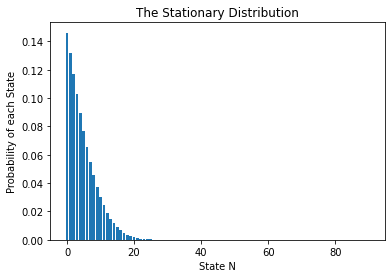

In [5]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import random

# for simulation
fig, ax = plt.subplots()
x_list = []
for k in range(0, 91):
    x_list.append(k)

ax.bar(x_list, result)
ax.set_xlabel("State N")
ax.set_ylabel("Probability of each State")
ax.set_title("The Stationary Distribution")  

plt.show()

In [14]:
# solve poisson equations
from scipy.linalg import solve
reward = [0]*92
flag = [0]*90
flag.append(1)

probability = np.zeros((92,92))
poisson = np.zeros((92,92))
for i in range(91):
    reward[i] = (i*0.01 + 0.1)
for i in range(91):
    poisson[i, i] = 1
    poisson[i, i + 1] = (i * 0.01) - 0.9
    poisson[i, 0] = poisson[i, 0] - (0.01 * i) - 0.1
    poisson[i, 91] = 1
poisson[91, 0] = 1
print(poisson)

result = np.linalg.solve(poisson, reward)

print(result)

[[ 0.9  -0.9   0.   ...  0.    0.    1.  ]
 [-0.11  1.   -0.89 ...  0.    0.    1.  ]
 [-0.12  0.    1.   ...  0.    0.    1.  ]
 ...
 [-0.99  0.    0.   ...  1.   -0.01  1.  ]
 [-1.    0.    0.   ...  0.    1.    1.  ]
 [ 1.    0.    0.   ...  0.    0.    0.  ]]
[-0.          0.05121949  0.09810903  0.14114383  0.1807372   0.2172497
  0.25099676  0.28225512  0.31126827  0.33825099  0.36339325  0.38686349
  0.40881143  0.42937048  0.44865976  0.46678593  0.48384463  0.49992185
  0.51509506  0.52943416  0.5430024   0.55585706  0.56805015  0.57962896
  0.59063657  0.60111229  0.61109205  0.62060874  0.6296925   0.63837104
  0.64666981  0.65461225  0.66221999  0.66951298  0.67650969  0.6832272
  0.68968134  0.69588683  0.7018573   0.70760546  0.71314314  0.71848136
  0.72363041  0.72859991  0.73339883  0.73803559  0.74251806  0.74685364
  0.75104926  0.75511144  0.7590463   0.7628596   0.76655677  0.77014293
  0.77362291  0.77700125  0.78028226  0.78347001  0.78656835  0.78958092
  0.7925

In [53]:
# policy iteration
from scipy.linalg import solve
import operator
reward = np.zeros((92, 2))
p = np.zeros((92, 92, 2))

for i in range(91):
    reward[i, 0] = (i*0.01 + 0.1)
    reward[i, 1] = 0.5
for i in range(91):
    p[i, i, 0] = 1
    p[i, i + 1, 0] = (i * 0.01) - 0.9
    p[i, 0, 0] = p[i, 0, 0] - (0.01 * i) - 0.1
    p[i, 91, 0] = 1
    
    p[i, i, 1] = 1
    p[i, 0, 1] = p[i, 0, 1] - 1
    p[i, 91, 1] = 1
p[91, 0, 0] = 1
p[91, 0, 1] = 1
print(p[:,:,0])
print(p[:,:,1])
print(reward[:,0])
v = np.linalg.solve(p[:,:,0], reward[:, 0])
cmp_policy = [0] * 91 
policy = [0] * 91
while True:
    for i in range(91):
        temp_0 = p[i, (i + 1)%91 , 0] * (-1) * v[i + 1] + p[i, 0, 0] * (-1) * v[0] + reward[i, 0]
        
        if i == 0:
            temp_0 = p[i, (i + 1)%91 , 0] * (-1) * v[i + 1] + 0.1 * v[0] + reward[i, 0]
        
        temp_1 = p[i, 0, 1] * (-1) * v[0] + reward[i, 1]
         
        if temp_0 <= temp_1:
            cmp_policy[i] = 0
        else:
            cmp_policy[i] = 1
            
    if operator.eq(policy, cmp_policy) == True:
        print(policy)
        print(v)
        break
    
    test = np.zeros((92,92))
    re = [0] * 92
    for i in range(91):
        for j in range(92):
            test[i, j] = p[i, j, cmp_policy[i]]
        re[i] = reward[i, cmp_policy[i]]
    for i in range(91, 92):
        for j in range(92):
            test[i, j] = p[i, j, 0]
        re[i] = reward[i, 0]
        
    v = np.linalg.solve(test, re)
    policy = cmp_policy


[[ 0.9  -0.9   0.   ...  0.    0.    1.  ]
 [-0.11  1.   -0.89 ...  0.    0.    1.  ]
 [-0.12  0.    1.   ...  0.    0.    1.  ]
 ...
 [-0.99  0.    0.   ...  1.   -0.01  1.  ]
 [-1.    0.    0.   ...  0.    1.    1.  ]
 [ 1.    0.    0.   ...  0.    0.    0.  ]]
[[ 0.  0.  0. ...  0.  0.  1.]
 [-1.  1.  0. ...  0.  0.  1.]
 [-1.  0.  1. ...  0.  0.  1.]
 ...
 [-1.  0.  0. ...  1.  0.  1.]
 [-1.  0.  0. ...  0.  1.  1.]
 [ 1.  0.  0. ...  0.  0.  0.]]
[0.1  0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23
 0.24 0.25 0.26 0.27 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37
 0.38 0.39 0.4  0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51
 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65
 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79
 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93
 0.94 0.95 0.96 0.97 0.98 0.99 1.   0.  ]
ok
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [94]:
# value iteration
from scipy.linalg import solve
import operator
reward = np.zeros((91, 2))
p = np.zeros((91, 91, 2))

for i in range(91):
    reward[i, 0] = (i*0.01 + 0.1)
    reward[i, 1] = 0.5
for i in range(91):

    p[i, (i + 1)%91, 0] = 0.9 - (i * 0.01) 
    p[i, 0, 0] = (0.01 * i) + 0.1 - p[i, 0, 0]
    # p[i, 91, 0] = 1
    
    
    p[i, 0, 1] = 1 - p[i, 0, 1]
    # p[i, 91, 1] = 1
# p[91, 0, 0] = 1
# p[91, 0, 1] = 1
# print(p[:,:,0])
# print(p[:,:,1])
# print(reward[:,0])
v = [0] * 91
# print(v)
v_now = [0] * 91 
policy = [0] * 91
flag = 0
while True:
    
    v = np.minimum(
                reward[:,0] + (p[:,:,0] @ v)
                , reward[:,1] + (p[:,:,1] @ v)
                )
    print(v)
    for i in range(91):
        policy[i] = np.argmin([reward[i, 0] + p[i,:,0] @ v, reward[i, 1] + p[i,:,1] @ v]) 
    v_next = v
    for i in range(91):
        if abs(v_next[i] - v_now[i]) >= 0.145:
            flag = 1
    if flag == 0:
        print(count)
        break;
    flag = 0
    v_now = v_next
    
print(policy)


[0.1  0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23
 0.24 0.25 0.26 0.27 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37
 0.38 0.39 0.4  0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.5 ]
[0.209  0.2278 0.2464 0.2648 0.283  0.301  0.3188 0.3364 0.3538 0.371
 0.388  0.4048 0.4214 0.4378 0.454  0.47   0.4858 0.5014 0.5168 0.532
 0.547  0.5618 0.5764 0.5908 0.6    0.6    0.6    0.6    0.6    0.6
 0.6    0.6    0.6    0.6    0.6    0.6    0.6    0.6    0.6    0.6
 0.6    0.6    0.6    0.6    0.6    0.6    0.6    0.6    0.6    0.6
 0.6    0.6    0.6    0.6    0.6    0.6    0.6    0.6    0.6    0.6
 0.6    0.6    0.6    0.6    0.6    0.6    0.6    0.6    0.6    0.6
 0.6    0.6    0.6    0.6    0.6    0.6    0.6    0.6    0.6 

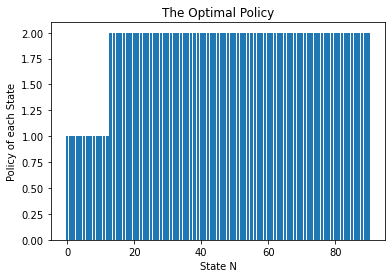

In [95]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import random

# for simulation
fig, ax = plt.subplots()
x_list = []
for k in range(0, 91):
    x_list.append(k)
    policy[k] = policy[k] + 1

ax.bar(x_list, policy)
ax.set_xlabel("State N")
ax.set_ylabel("Policy of each State")
ax.set_title("The Optimal Policy")  

plt.show()